In [1]:
def findFeature(ls1):  #第一份檔案 : 左手圓極化; 
    import csv
    
    def intersectx(x1, y1, x2, y2, targety):
        return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)
    
    out = [] #左手圓極化 max / 3dB / localMax / localMin / Side Lobe Gain

    ls1 = ls1[0:268]
    main = max(ls1)
    out.append(main)
    k = ls1.index(main)
    m = k
    while ls1[k] > (main -3) :
        k -= 1
    L = intersectx(k-180, ls1[k], k-179, ls1[k+1], main-3)
       
    while ls1[m] > (main -3) :
        m += 1
    H = intersectx(m-180, ls1[m], m-181, ls1[m-1], main-3)
    out.append(H - L)
        
    localMax = []
    ind1 = []
    former = ls1[0]
    for i in range(1, 267):
        if ls1[i] > former and ls1[i] > ls1[i+1]:
            localMax.append(ls1[i])
            ind1.append(i)
        former= ls1[i]
    out.append(len(localMax))
        
    localMin = []
    ind2 = []
    former2 = ls1[0]
    for i in range(1, 267):
        if ls1[i] < former2 and ls1[i] < ls1[i+1]:
            localMin.append(ls1[i])
            ind2.append(i)
        former2= ls1[i]
    out.append(len(localMin))

    out.append(localMax[localMax.index(max(localMax))-1])
    '''    
    center = ls2[len(ls2)//2]
        
    x = ls2.index(center)
    y = x
    while ls2[x] < center +3 :
        x -= 1
    l = intersectx(x-180, ls2[x], x-179, ls2[x+1], center+3)
       
    while ls2[y] < center +3 :
        y += 1
    h = intersectx(y-180, ls2[y], y-181, ls2[y-1], center+3)
    out.append(h - l)
    '''    
    return out

In [2]:
import csv
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.stats as stats
import numpy as np

In [3]:
with open('LHCP 0818.csv', "r") as file:
    raw = list(csv.reader(file))
    Df = []
    Val = []
    for i in range(1,len(raw[0])):
        ls = []
        df = float(raw[0][i].split("$Df='")[1].split("'")[0])
        if raw[0][i].split("Phi='")[1].split("'")[0] == '0deg':
            dk = float(raw[0][i].split("$Dk='")[1].split("'")[0])
            Df.append([df,dk])
            for j in range(1, len(raw)):
                ls.append(float(raw[j][i]))
            Val.append(ls)

In [29]:
'''
Df = 0 時的 (Main Lobe Gain, Main Lobe 3dB Width)
Dk = 1.50 : (8.28257609233709, 27.04187464155035)
Dk = 2.50 : (7.22278742905561, 26.158804260128846)
Dk = 3.50 : (5.9056919003971, 25.421481201314496)
Dk = 4.50 : (4.67875657023212, 25.145922536625896)
Dk = 5.50 : (4.48020887903446, 24.117012180722373)

Df = 0時的 Left Side Lobe Gain
Dk = 1.50 : 0.778887448896868
Dk = 2.50 : 0.377817490462811
Dk = 3.50 : 0.0723303287149358
Dk = 4.50 : -1.6743007059779
Dk = 5.50 : -2.49344430252503
'''

'\nDf = 0 時的 (Main Lobe Gain, Main Lobe 3dB Width)\nDk = 1.50 : (8.28257609233709, 27.04187464155035)\nDk = 2.50 : (7.22278742905561, 26.158804260128846)\nDk = 3.50 : (5.9056919003971, 25.421481201314496)\nDk = 4.50 : (4.67875657023212, 25.145922536625896)\nDk = 5.50 : (4.48020887903446, 24.117012180722373)\n'

In [4]:
out1 = [] # Main Lobe Gain 和 Df = 0的差距
out2 = [] # Main Lobe 3dB Width 和 Df = 0 的差距
out3 = []
dfset = []
for m in range(25):
    dfset.append(0.002*(m+1))
    diff_gain = []
    diff_width = []
    diff_side = []
    for n in range(5):
        x = findFeature(Val[5*m + n])
        if n == 0:    #Dk = 1.50
            diff_gain.append(x[0] - 8.28257609233709)
            diff_width.append(x[1] - 27.04187464155035)
            diff_side.append(x[4] - 0.778887448896868)
        elif n == 1:   #Dk = 2.50
            diff_gain.append(x[0] - 7.22278742905561)
            diff_width.append(x[1] - 26.158804260128846)
            diff_side.append(x[4] - 0.377817490462811)
        elif n == 2:   #Dk = 3.50
            diff_gain.append(x[0] - 5.9056919003971)
            diff_width.append(x[1] - 25.421481201314496)
            diff_side.append(x[4] - 0.0723303287149358)
        elif n == 3:   #Dk = 4.50
            diff_gain.append(x[0] - 4.67875657023212)
            diff_width.append(x[1] - 25.145922536625896)
            diff_side.append(x[4] - (-1.6743007059779))
        else:          #Dk = 5.50
            diff_gain.append(x[0] - 4.48020887903446)
            diff_width.append(x[1] - 24.117012180722373)
            diff_side.append(x[4] - (-2.49344430252503))
    out1.append(sum(diff_gain)/5)
    out2.append(sum(diff_width)/5)
    out3.append(sum(diff_side)/5)

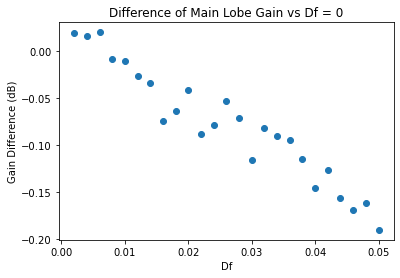

Correlation Coefficient of Df and Main Lobe Gain Difference = -0.9617717890864638
Prediction Equation : y1 = -3.9642200106153873 x + 0.025257270056724186



In [5]:
plt.scatter(dfset, out1)
plt.xlabel('Df')
plt.ylabel('Gain Difference (dB)')
plt.title('Difference of Main Lobe Gain vs Df = 0')
plt.show()
print('Correlation Coefficient of Df and Main Lobe Gain Difference =',stats.pearsonr(dfset, out1)[0])
args1 = np.polyfit(dfset, out1, 1)
print("Prediction Equation : y1 =", args1[0],"x +", args1[1])
print('')

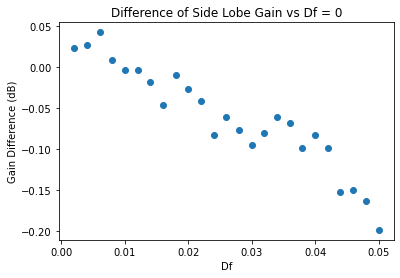

Correlation Coefficient of Df and Side Lobe Gain Difference = -0.9481521916466378
Prediction Equation : y3 = -4.0412532766923075 x + 0.044493366807663075



In [6]:
plt.scatter(dfset, out3)
plt.xlabel('Df')
plt.ylabel('Gain Difference (dB)')
plt.title('Difference of Side Lobe Gain vs Df = 0')
plt.show()
print('Correlation Coefficient of Df and Side Lobe Gain Difference =',stats.pearsonr(dfset, out3)[0])
args1 = np.polyfit(dfset, out3, 1)
print("Prediction Equation : y3 =", args1[0],"x +", args1[1])
print('')

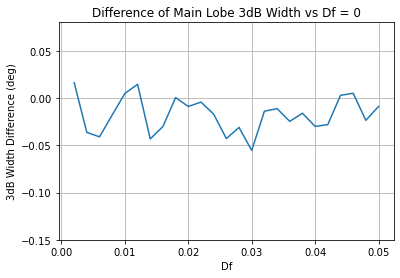

In [7]:
plt.plot(dfset, out2)
plt.xlabel('Df')
plt.ylabel('3dB Width Difference (deg)')
plt.title('Difference of Main Lobe 3dB Width vs Df = 0')
plt.ylim(-0.15, 0.08)
plt.grid(True)
plt.show()